## Ordinary Differential Equation

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

![img](img/three-state.png)

### Three State Markov Model

$\large{\frac{dO(t)}{dt} = k_{io}I(t) + k_{co}.C(t) - (k_{oi} + k_{oc})O(t)}$ 

$\large{\frac{dC(t)}{dt} = k_{oc}C(t) + k_{ic}.I(t) - (k_{co} + k_{ci})C(t)}$ 

$\large{\frac{dI(t)}{dt} = k_{oi}O(t) + k_{ci}.C(t) - (k_{io} + k_{ic})I(t)}$ 

In [2]:
k = {"koi":0.5,\
     "kio":0.3,\
     "kco": 0.6,\
     "koc": 0.9,\
     "kic":0.72,\
     "kci":0.8}

#### Disregarding Total probability and infinite population of state

In [3]:
# function that returns dy/dt
def model1(y,t,k):
    
    '''y[0] = O, y[1] = C, y[2] = I'''
    
    dy1dt = k['kio']*y[2] + k['kco']*y[1] - (k['koi'] + k['koc'])*y[0]
    dy2dt = k['koc']*y[1] + k['kic']*y[2] - (k['kco'] + k['kci'])*y[1]
    dy3dt = k['koi']*y[0] + k['kci']*y[1] - (k['kio'] + k['kic'])*y[2]
    
    dydt = [dy1dt,dy2dt,dy3dt]
    return dydt

In [4]:
# initial condition
y0 = [1,0,0]

# time points
t = np.linspace(0,20)


'''solve ODEs'''
y = odeint(model1,y0,t,args=(k,))


y1 = np.empty_like(t)
y2 = np.empty_like(t)
y3 = np.empty_like(t)
for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = y[i][2]

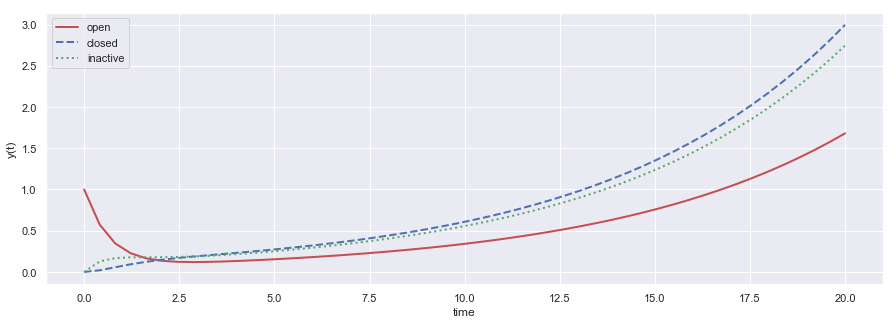

In [5]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,'r-',linewidth=2,label='open')
plt.plot(t,y2,'b--',linewidth=2,label='closed')
plt.plot(t,y3,'g:',linewidth=2,label='inactive')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

#### Considering total probability = 1

These equations :
    
$\large{\frac{dO(t)}{dt} = k_{io}I(t) + k_{co}.C(t) - (k_{oi} + k_{oc})O(t)}$ 

$\large{\frac{dC(t)}{dt} = k_{oc}C(t) + k_{ic}.I(t) - (k_{co} + k_{ci})C(t)}$ 

$\large{\frac{dI(t)}{dt} = k_{oi}O(t) + k_{ci}.C(t) - (k_{io} + k_{ic})I(t)}$ 

with condition:

$\large{I = 1 - (O + C)}$
    
becomes:

$\large{\frac{dO(t)}{dt} = k_{io} + (k_{co} - k_{io}).C(t) - (k_{oi} + k_{oc} +k_{io})O(t)}$ 

$\large{\frac{dC(t)}{dt} = k_{ic} + (k_{oc} - k_{ic}).O(t) - (k_{co} + k_{ci} + k_{ic})C(t)}$ 


In [6]:
# function that returns dy/dt
def model2(y,t,k):
    
    '''y[0] = O, y[1] = C, y[2] = I'''
    
    dy1dt = k['kio'] +  (k['kco'] - k['kio'])*y[1] - (k['koi'] + k['koc'] + k['kio'])*y[0]
    dy2dt = k['kic'] +  (k['koc'] - k['kic'])*y[0] - (k['kco'] + k['kci'] + k['kic'])*y[1]
    dydt = [dy1dt,dy2dt]
    return dydt

In [7]:
N = 1
T =10

# initial condition
y0 = [N,0]

# time points
t = np.linspace(0,T)


'''solve ODEs'''
y = odeint(model2,y0,t,args=(k,))


y1 = np.empty_like(t)
y2 = np.empty_like(t)
for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = N - y[i][0] - y[i][1]

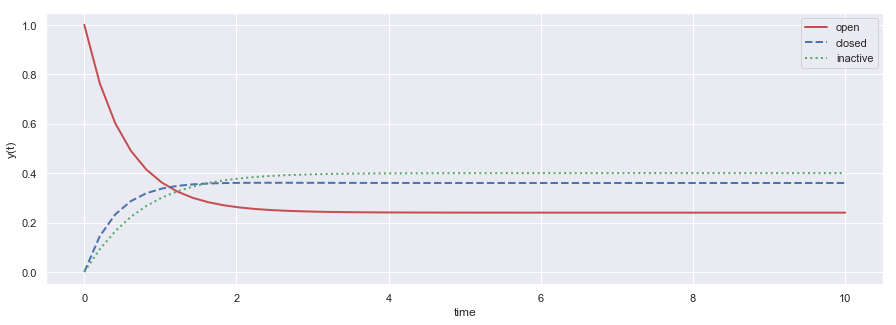

In [8]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,'r-',linewidth=2,label='open')
plt.plot(t,y2,'b--',linewidth=2,label='closed')
plt.plot(t,y3,'g:',linewidth=2,label='inactive')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()